In [1]:
import torch
from torchvision import datasets, transforms
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

True


device(type='cuda')

In [2]:
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder('./datasets', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=32,
                                         shuffle=True)

In [3]:
batched_data = iter(dataloader)

In [4]:
next(batched_data)[0][0].size()

torch.Size([3, 224, 224])

AttributeError: 'numpy.flatiter' object has no attribute 'imshow'

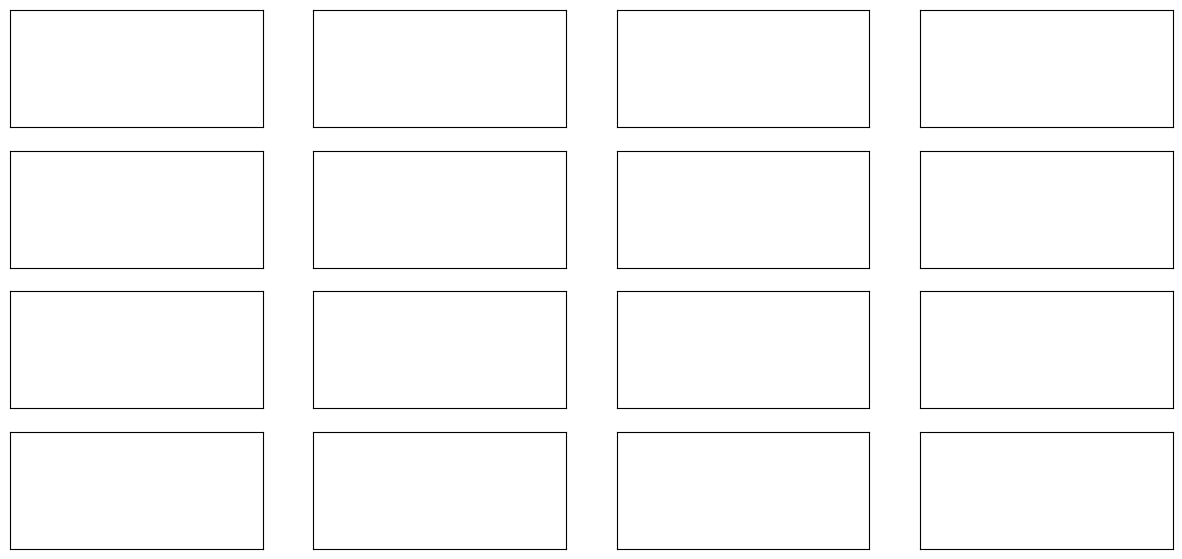

In [18]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    return ax

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), #Размер вывода
             subplot_kw={'xticks': [], 'yticks': []})
data = next(batched_data)
for i in range(10):
    imshow(data[0][i], normalize=False, ax=axes.flat)

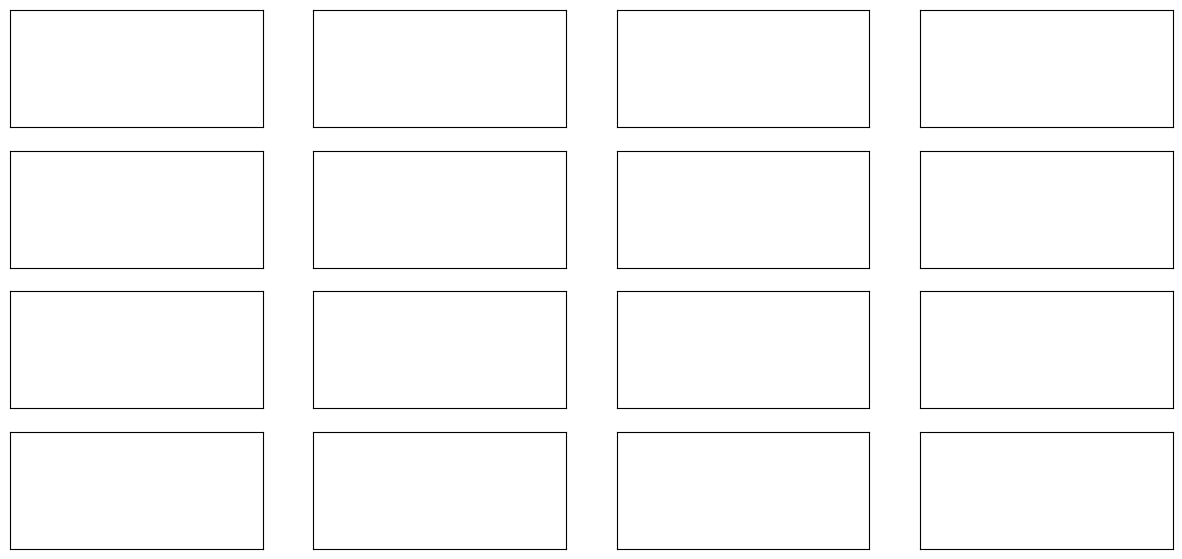

In [51]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 7), #Размер вывода
                         subplot_kw={'xticks': [], 'yticks': []})
enumerate(axes.flat) # .imshow(data[1][0])

In [9]:
np.shape(next(batched_data)[0][0].numpy().transpose((1, 2, 0)))

(224, 224, 3)

In [10]:
next(batched_data)[0][0].resize(224,224,3).size()

torch.Size([224, 224, 3])

In [ ]:
numSegments = 20
image = img_as_float(next(batched_data)[0][0].numpy().transpose((1, 2, 0)))
segments = slic(image, n_segments=numSegments, sigma=2)
# fig = plt.figure("Superpixels -- %d segments" % (numSegments))
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(color.label2rgb(segments, image, kind='avg'))
# plt.axis("off")

In [1]:
from skimage import io
io.imread('./datasets/landscapes/0.jpg')

array([[[122, 150, 127],
        [122, 150, 127],
        [122, 150, 127],
        ...,
        [123, 148, 126],
        [123, 148, 126],
        [123, 148, 126]],

       [[122, 150, 127],
        [122, 150, 127],
        [122, 150, 127],
        ...,
        [124, 149, 127],
        [123, 148, 126],
        [123, 148, 126]],

       [[122, 150, 127],
        [122, 150, 127],
        [122, 150, 127],
        ...,
        [124, 149, 127],
        [124, 149, 127],
        [123, 148, 126]],

       ...,

       [[ 18,  23,   0],
        [ 19,  24,   1],
        [ 21,  26,   4],
        ...,
        [ 99, 111,   0],
        [ 95, 107,   0],
        [112, 124,  12]],

       [[ 19,  25,   0],
        [ 19,  25,   0],
        [ 20,  25,   2],
        ...,
        [130, 143,  27],
        [174, 187,  73],
        [127, 140,  26]],

       [[ 23,  29,   1],
        [ 22,  28,   2],
        [ 21,  26,   3],
        ...,
        [128, 141,  25],
        [122, 135,  19],
        [ 94, 107,   0]]

In [7]:
!cd

D:\Github proj\MachineLearning\ML\PROducts\Neuro


In [17]:
import os

os.listdir('./datasets/landscapes')

['00000000.jpg',
 '00000000_(2).jpg',
 '00000000_(3).jpg',
 '00000000_(4).jpg',
 '00000000_(5).jpg',
 '00000000_(6).jpg',
 '00000000_(7).jpg',
 '00000001.jpg',
 '00000001_(2).jpg',
 '00000001_(3).jpg',
 '00000001_(4).jpg',
 '00000001_(5).jpg',
 '00000001_(6).jpg',
 '00000001_(7).jpg',
 '00000002.jpg',
 '00000002_(2).jpg',
 '00000002_(3).jpg',
 '00000002_(4).jpg',
 '00000002_(5).jpg',
 '00000002_(6).jpg',
 '00000003.jpg',
 '00000003_(2).jpg',
 '00000003_(3).jpg',
 '00000003_(4).jpg',
 '00000003_(5).jpg',
 '00000003_(6).jpg',
 '00000003_(7).jpg',
 '00000004.jpg',
 '00000004_(2).jpg',
 '00000004_(3).jpg',
 '00000004_(4).jpg',
 '00000004_(5).jpg',
 '00000004_(6).jpg',
 '00000004_(7).jpg',
 '00000005.jpg',
 '00000005_(2).jpg',
 '00000005_(3).jpg',
 '00000005_(4).jpg',
 '00000005_(5).jpg',
 '00000005_(6).jpg',
 '00000005_(7).jpg',
 '00000006.jpg',
 '00000006_(2).jpg',
 '00000006_(3).jpg',
 '00000006_(4).jpg',
 '00000006_(5).jpg',
 '00000006_(6).jpg',
 '00000007.jpg',
 '00000007_(2).jpg',
 '0

In [64]:
i = 0
dir_files = os.listdir('./datasets/landscapes')
os.chdir('./datasets/landscapes')
for filename in dir_files:
    os.rename(filename, f'{i}.jpg')
    i += 1
os.chdir(r'D:\Github proj\MachineLearning\ML\PROducts\Neuro')
!cd

FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: '10.jpg' -> '2.jpg'

In [ ]:
path = r'D:\Github proj\MachineLearning\ML\PROducts\Neuro\datasets\landscapes\0.jpg'
image = img_as_float(io.imread(path))
image
# loop over the number of segments
for numSegments in (20,):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments=numSegments, sigma=2)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(color.label2rgb(segments, image, kind='avg'))
    plt.axis("off")
# show the plots
plt.show()